In [2]:
from scipy import misc
from scipy.fftpack import ifft, fft, fftfreq, fft2, ifft2, fftn, ifftn
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import fftpack

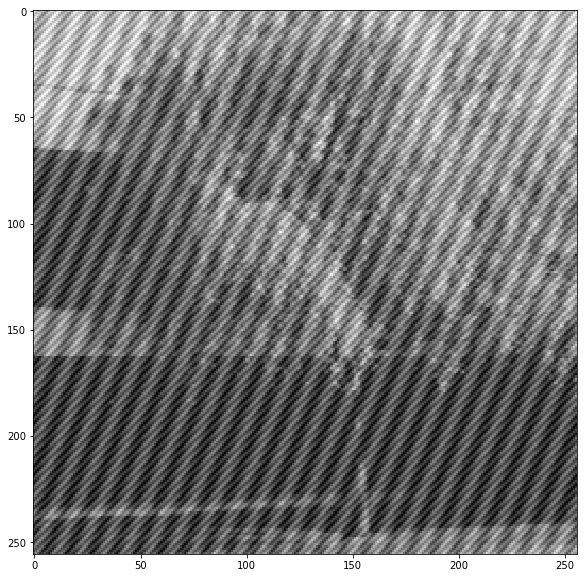

In [3]:
# leyendo la imagen y tomandola como array 
arbol = plt.imread('Arboles.png')
#print (type(arbol))
plt.figure(figsize=(10,10))
plt.imshow(1.5*arbol,cmap=plt.cm.gray)

plt.show()

In [4]:
# Ahora encontremos la transformada de Fourier del arbol 
plt.figure(figsize=(10,10))
arbol_dft=fft2(arbol)
print("La imagen leída como un arreglo es", arbol_dft,)
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencias')
plt.ylabel('Señal')
plt.plot(arbol_dft)
plt.savefig('GomezMaria_FT2D')
plt.close()
mag_arbol_dft=np.log(np.abs(arbol_dft))
fx, fy = np.meshgrid(np.linspace(0,1,len(arbol)),np.linspace(0,1,len(arbol)))

La imagen leída como un arreglo es [[ 29859.94921875   +0.j            511.00927734+1223.40466309j
     282.65374756 +508.52105713j ...,    161.54876709  +78.84896851j
     282.65365601 -508.52111816j    511.00915527-1223.40466309j]
 [   948.93896484-3965.09912109j   1262.20239258 -760.16796875j
     172.19409180 -359.14926147j ...,    351.78839111  -47.89762878j
    -502.60470581 +553.22387695j    100.64231873 -196.06555176j]
 [  1616.76928711-2008.82531738j   -224.17559814 -729.13635254j
    -313.57876587 -154.18591309j ...,    -64.75349426 -178.28164673j
     650.07006836 -294.89587402j    -47.72266769 -771.2623291j ]
 ..., 
 [   405.11672974 +751.61657715j   -173.25628662  -20.14804077j
    -319.26861572  -17.16230011j ...,    -72.45321655  -59.4131813j
    -136.45661926 -283.34661865j   -372.67034912  +13.26820087j]
 [  1616.76940918+2008.82531738j    -47.72252274 +771.26239014j
     650.07006836 +294.89572144j ...,   -270.61737061  -19.17217255j
    -313.57876587 +154.18597412j  

/Users/mariafernandagomez/miniconda3/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


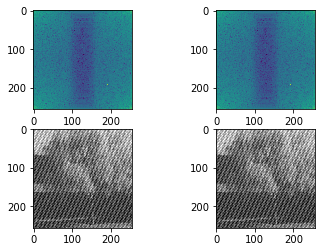

In [5]:
#lena_dft[np.sqrt(fx**2+fy**2) > 0.2]=0.
plt.subplot(2,2,1)
plt.imshow(mag_arbol_dft)
lim=0.1
#pick=(np.sqrt((fx-1)**2+fy**2) > lim)*(np.sqrt((fx)**2+fy**2) > lim)*(np.sqrt(fx**2+(fy-1)**2) > lim)*(np.sqrt((fx-1)**2+(fy-1)**2) > lim)
#lena_dft[pick]=0.
mag_arbol_dft=np.log(np.abs(arbol_dft))
plt.subplot(2,2,2)
plt.imshow(mag_arbol_dft)
angle_arbol_dft=np.angle(arbol_dft)
arbol_recovered=np.real(ifft2(arbol_dft))
plt.subplot(2,2,3)
plt.imshow(arbol,interpolation=None, cmap=plt.cm.gray)
plt.subplot(2,2,4)
plt.imshow(arbol_recovered,interpolation=None,cmap=plt.cm.gray)
plt.show()

/Users/mariafernandagomez/miniconda3/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


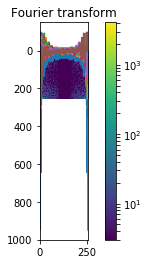

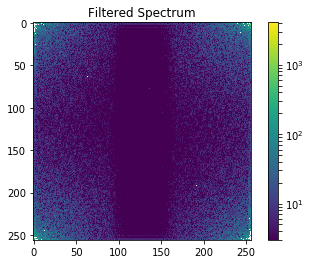

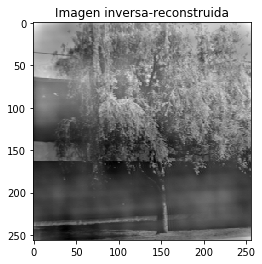

In [9]:
def filtro_corte(corte1, corte2):
    
    for i in range(256):
        for j in range(256):
            if(arbol_dft[i][j]>corte1):
                arbol_dft[i][j]=0
            if(arbol_dft[i][j]<-corte2):
                arbol_dft[i][j]=0
                
    return arbol_dft

def espectro(arbol_dft):
    
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(arbol_dft), norm=LogNorm(vmin=3))
    plt.colorbar()

plt.figure()
espectro(arbol_dft)
plt.title('Fourier transform')  

f_arbol= filtro_corte(1000,100)
plt.plot(f_arbol)
plt.show()

plt.figure()
espectro(arbol_fft2)
plt.title('Filtered Spectrum')
arbol_fft2 = f_arbol.copy()
arbol_new = fftpack.ifft2(arbol_fft2).real
plt.figure()
plt.imshow(arbol_new, plt.cm.gray)
#se muestra la reconstrucción de la imagen
plt.title('Imagen inversa-reconstruida')
plt.show()